# 04 - Supervised Learning: Classification Models

This notebook trains and evaluates classification models to predict heart disease.

### Models:
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

### Evaluation Metrics:
- Accuracy, Precision, Recall, F1-Score
- ROC Curve & AUC Score


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


## Step 1: Load Selected Features Dataset


In [ ]:
df = pd.read_csv('data/heart_disease_selected.csv')
df.head()


,PC1,PC5,PC4,PC9,PC2,PC8,PC7,PC6,PC3,PC10,target
0,0.613803,2.211090,-0.816134,-0.099221,2.344950,0.016348,1.455185,1.823751,4.543948,-0.112827,0
1,3.469339,0.171983,-0.840263,-0.411693,0.918380,0.169923,-0.043497,0.848224,-1.175232,-0.208924,1
2,3.324561,-0.745340,-0.046004,-0.997485,-0.720734,0.576024,-0.234373,0.324757,-0.461900,-0.259045,1
3,-1.689203,-0.098559,1.035580,-0.917294,0.408676,0.902457,1.106077,-2.351468,3.827134,0.236137,0
4,-2.545574,1.218582,-1.271556,-0.007793,-0.438278,1.227352,0.392801,-0.335912,-0.015576,-0.462969,0


## Step 2: Split Data into Train and Test Sets (80/20)


In [3]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (237, 10)
Test size: (60, 10)


## Step 3: Define Helper Function to Evaluate Models


In [4]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"--- {name} ---")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-Score : {f1:.3f}")
    if auc: print(f"AUC Score: {auc:.3f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')


## Step 4: Train and Evaluate Models


--- Logistic Regression ---
Accuracy : 0.833
Precision: 0.846
Recall   : 0.786
F1-Score : 0.815
AUC Score: 0.943

Confusion Matrix:
[[28  4]
 [ 6 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

--- Decision Tree ---
Accuracy : 0.817
Precision: 0.793
Recall   : 0.821
F1-Score : 0.807
AUC Score: 0.817

Confusion Matrix:
[[26  6]
 [ 5 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60

--

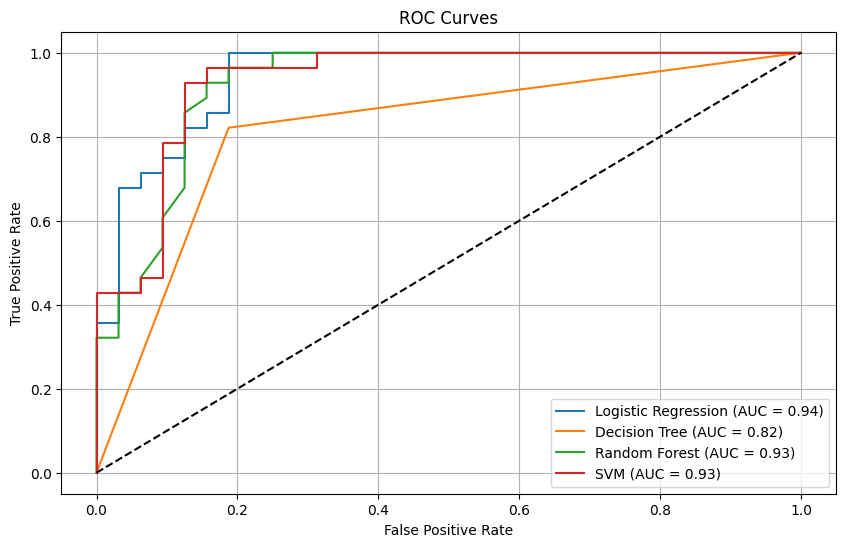

In [5]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)  # Required for ROC curve
}

# Train, evaluate, and collect results
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


## Step 5: Save Trained Models
We will save models for future use and deployment.


In [ ]:
import joblib
import os

os.makedirs('../models', exist_ok=True)

for name, model in models.items():
    filename = f"../models/{name.lower().replace(' ', '_')}.pkl"
    joblib.dump(model, filename)

print("All models saved successfully.")


All models saved successfully.


## Summary:
- All 4 classification models were trained and evaluated.
- Best-performing model will be tuned next in `05_hyperparameter_tuning.ipynb`
